In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [3]:
ds=pd.read_csv(r"C:\Users\arunf\OneDrive\Documents\Data Science\Machine Learning\DataSet\Star3642_balanced.csv")

In [4]:
ds

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,K4III,14.856089,0
3638,8.29,6.38,1.00,0.408,F2IV/V,17.314104,1
3639,6.11,2.42,0.79,1.664,M0/M1IIICNp,13.029078,0
3640,7.94,4.94,2.90,0.210,A5V,16.408636,1


In [5]:
le=preprocessing.LabelEncoder()

In [6]:
ds['SpType']=le.fit_transform(ds['SpType'].astype(str))

In [7]:
ds

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,522,16.678352,0
1,8.70,2.31,1.29,-0.045,99,15.518060,0
2,5.77,5.50,1.03,0.855,337,14.471813,0
3,6.72,5.26,0.74,-0.015,150,15.324928,1
4,8.76,13.44,1.16,0.584,293,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089,0
3638,8.29,6.38,1.00,0.408,208,17.314104,1
3639,6.11,2.42,0.79,1.664,539,13.029078,0
3640,7.94,4.94,2.90,0.210,53,16.408636,1


In [8]:
ds.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [9]:
train,test=train_test_split(ds,test_size=0.2)

In [10]:
trainx=train.iloc[:,:6]
trainy=train.iloc[:,6]
testx=test.iloc[:,:6]
testy=test.iloc[:,6]

In [11]:
trainx

,Vmag,Plx,e_Plx,B-V,SpType,Amag
1750,8.65,4.93,0.98,0.370,207,17.114235
1839,8.66,32.32,9.52,0.566,287,21.207357
2199,8.85,1.28,1.38,1.012,433,14.386050
1689,7.93,0.34,0.74,1.570,545,10.587395
594,9.15,3.18,0.94,1.438,475,16.662136
...,...,...,...,...,...,...
3387,5.54,10.04,0.86,-0.064,178,15.548669
1844,9.68,9.53,1.39,0.502,259,19.575464
2463,8.07,1.15,0.97,1.599,540,13.373488
729,8.36,11.81,0.99,0.531,251,18.721249


In [12]:
trainy

1750    1
1839    1
2199    0
1689    0
594     0
       ..
3387    1
1844    1
2463    0
729     1
1833    0
Name: TargetClass, Length: 2913, dtype: int64

In [13]:
dtc=DTC(criterion='entropy')

In [14]:
pred=dtc.fit(trainx,trainy).predict(testx)
cm=confusion_matrix(pred,testy)
acc=np.mean(pred==testy.values.flatten())

In [15]:
cm

array([[301,  43],
       [ 40, 345]], dtype=int64)

In [16]:
mean=(342+333)/(342+333+27+27)
mean

0.9259259259259259

In [17]:
acc

0.8861454046639232

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

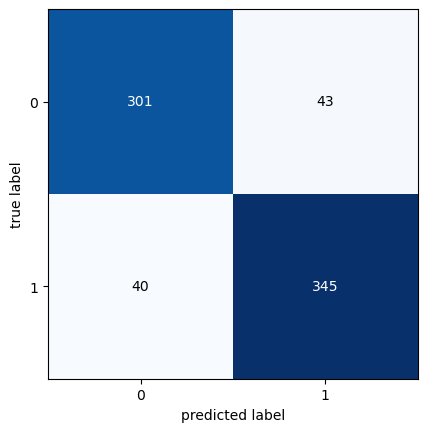

In [18]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)